# 控件

很神奇的,matplot还提供了简单的可供交互的控件包括

+ buttons 按钮
+ check_buttons 选择按钮
+ radio_buttons 多选按钮
+ menu 目录


In [1]:
from __future__ import print_function
from imp import reload
import matplotlib
reload(matplotlib)

matplotlib.use('nbagg')

import matplotlib.backends.backend_nbagg
reload(matplotlib.backends.backend_nbagg)
import matplotlib.backends.backend_webagg_core
reload(matplotlib.backends.backend_webagg_core)

<module 'matplotlib.backends.backend_webagg_core' from '/Users/huangsizhe/LIB/CONDA/anaconda/lib/python2.7/site-packages/matplotlib/backends/backend_webagg_core.pyc'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.interactive(False)

## 按钮bottom

添加按钮可以使用`plt.subplots_adjust(bottom=xx)`为其在底部留下足够空间

用`plt.axes([0.7, 0.05, 0.1, 0.075])`为按钮划定大小和位置

添加按钮可以使用`Button(ax, label, image=None, color='0.85', hovercolor='0.95')`

而为其添加回调函数,则可以用为其绑定`on_clicked`方法

```
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
```

这种形式

<IPython.core.display.Javascript object>


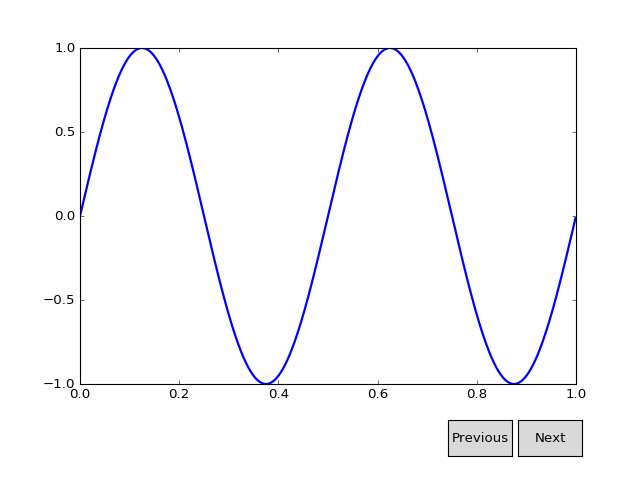

In [3]:
from matplotlib.widgets import Button
freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()


## 选择按钮CheckButtons

<IPython.core.display.Javascript object>


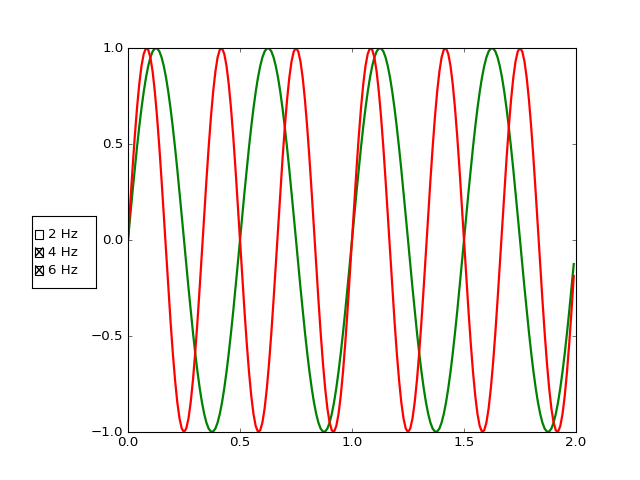

In [4]:
from matplotlib.widgets import CheckButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2)
l1, = ax.plot(t, s1, lw=2)
l2, = ax.plot(t, s2, lw=2)
plt.subplots_adjust(left=0.2)

rax = plt.axes([0.05, 0.4, 0.1, 0.15])
check = CheckButtons(rax, ('2 Hz', '4 Hz', '6 Hz'), (False, True, True))


def func(label):
    if label == '2 Hz':
        l0.set_visible(not l0.get_visible())
    elif label == '4 Hz':
        l1.set_visible(not l1.get_visible())
    elif label == '6 Hz':
        l2.set_visible(not l2.get_visible())
    plt.draw()
check.on_clicked(func)

plt.show()

## 单选框RadioButtons

<IPython.core.display.Javascript object>


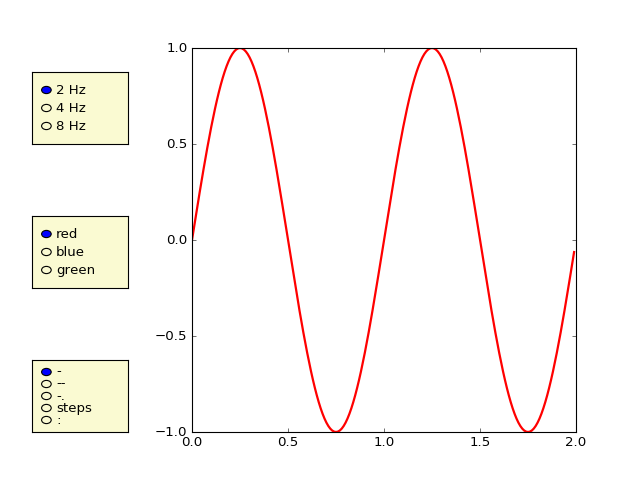

In [5]:
from matplotlib.widgets import RadioButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(8*np.pi*t)

fig, ax = plt.subplots()
l, = ax.plot(t, s0, lw=2, color='red')
plt.subplots_adjust(left=0.3)

axcolor = 'lightgoldenrodyellow'
rax = plt.axes([0.05, 0.7, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('2 Hz', '4 Hz', '8 Hz'))


def hzfunc(label):
    hzdict = {'2 Hz': s0, '4 Hz': s1, '8 Hz': s2}
    ydata = hzdict[label]
    l.set_ydata(ydata)
    plt.draw()
radio.on_clicked(hzfunc)

rax = plt.axes([0.05, 0.4, 0.15, 0.15], axisbg=axcolor)
radio2 = RadioButtons(rax, ('red', 'blue', 'green'))


def colorfunc(label):
    l.set_color(label)
    plt.draw()
radio2.on_clicked(colorfunc)

rax = plt.axes([0.05, 0.1, 0.15, 0.15], axisbg=axcolor)
radio3 = RadioButtons(rax, ('-', '--', '-.', 'steps', ':'))


def stylefunc(label):
    l.set_linestyle(label)
    plt.draw()
radio3.on_clicked(stylefunc)

plt.show()

## 滑块Slider

<IPython.core.display.Javascript object>


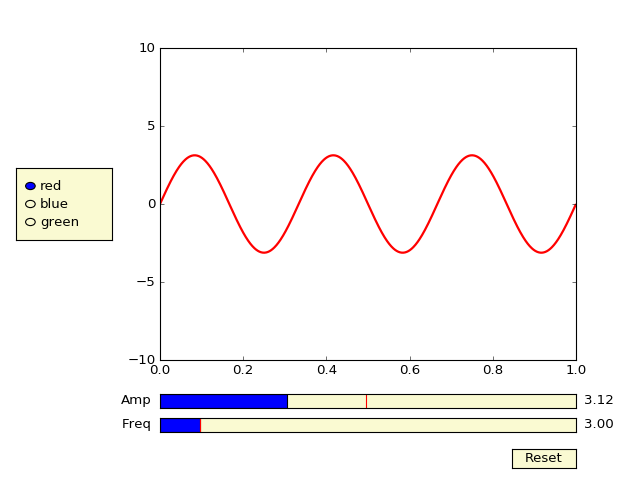

In [10]:
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

## 光标Cursor


<IPython.core.display.Javascript object>


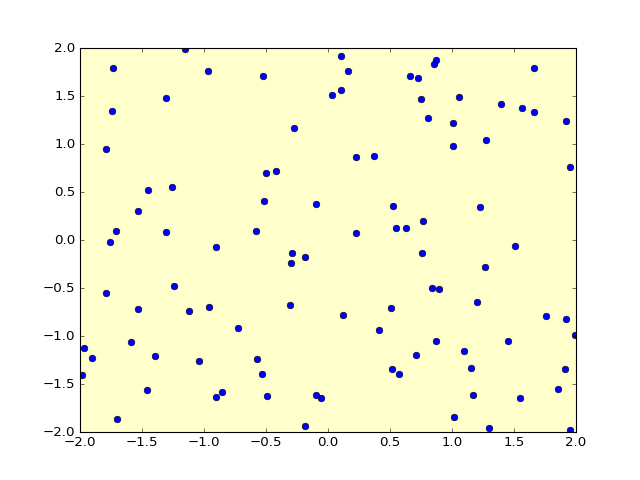

In [7]:
from matplotlib.widgets import Cursor


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, axisbg='#FFFFCC')

x, y = 4*(np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()

## 多路光标

<IPython.core.display.Javascript object>


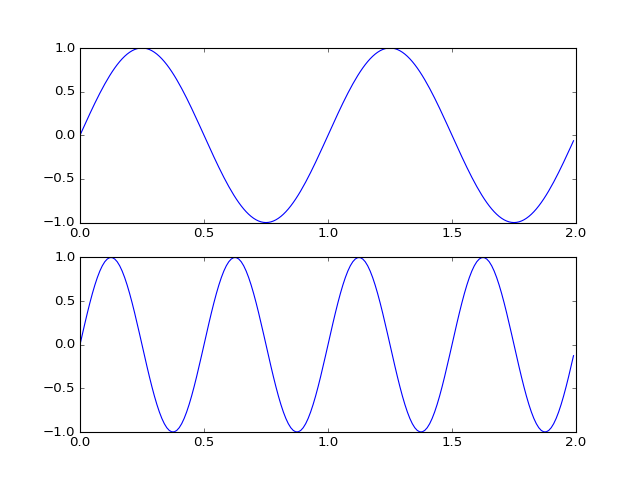

In [8]:
from matplotlib.widgets import MultiCursor

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(t, s1)


ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(t, s2)

multi = MultiCursor(fig.canvas, (ax1, ax2), color='r', lw=1)
plt.show()

## 矩形框 


      click  -->  release


<IPython.core.display.Javascript object>


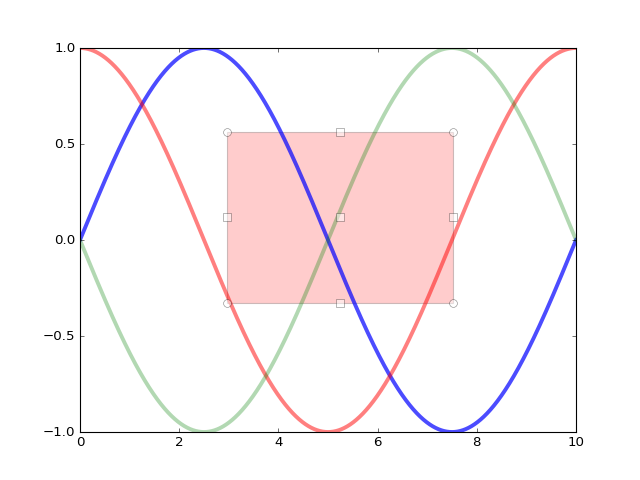

In [9]:
from matplotlib.widgets import RectangleSelector

def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))


def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)


fig, current_ax = plt.subplots()                    # make a new plotingrange
N = 100000                                       # If N is large one can see
x = np.linspace(0.0, 10.0, N)                    # improvement by use blitting!

plt.plot(x, +np.sin(.2*np.pi*x), lw=3.5, c='b', alpha=.7)  # plot something
plt.plot(x, +np.cos(.2*np.pi*x), lw=3.5, c='r', alpha=.5)
plt.plot(x, -np.sin(.2*np.pi*x), lw=3.5, c='g', alpha=.3)

print("\n      click  -->  release")

# drawtype is 'box' or 'line' or 'none'
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
plt.connect('key_press_event', toggle_selector)
plt.show()

## 选定区域SpanSelector

<IPython.core.display.Javascript object>


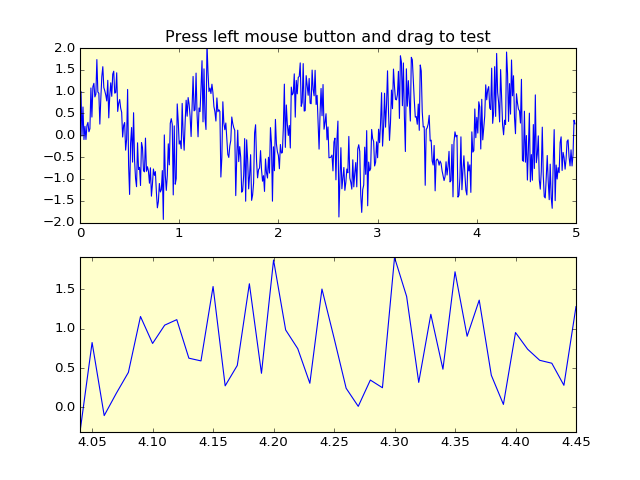

In [11]:
from matplotlib.widgets import SpanSelector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(211, axisbg='#FFFFCC')

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2*np.pi*x) + 0.5*np.random.randn(len(x))

ax.plot(x, y, '-')
ax.set_ylim(-2, 2)
ax.set_title('Press left mouse button and drag to test')

ax2 = fig.add_subplot(212, axisbg='#FFFFCC')
line2, = ax2.plot(x, y, '-')


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    line2.set_data(thisx, thisy)
    ax2.set_xlim(thisx[0], thisx[-1])
    ax2.set_ylim(thisy.min(), thisy.max())
    fig.canvas.draw()

# set useblit True on gtkagg for enhanced performance
span = SpanSelector(ax, onselect, 'horizontal', useblit=True,
                    rectprops=dict(alpha=0.5, facecolor='red'))


plt.show()